In [139]:
import pandas as pd
import numpy as np
from datetime import datetime
import string
import re
import emoji
import demoji
import matplotlib.pyplot as plt

# Loading Data

First let's load the data to df and take a look at what we currently have

In [140]:
df = pd.read_csv('tweets_hashtag.csv')
df

,id,content,language,datetime
0,0,"If you like Tacos, what do you like more - Har...",en,2022-01-30 20:27:04+00:00
1,1,@waiwode I’ve seen rumblings about that…shhhhh...,en,2022-01-30 20:23:28+00:00
2,2,"You can #okboomer me if you want, but if you s...",en,2022-01-30 20:20:50+00:00
3,3,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...,en,2022-01-30 19:44:56+00:00
4,4,"We are talking #TacoBell, #Truckers, and #Life...",en,2022-01-30 19:01:00+00:00
...,...,...,...,...
69996,69996,Tu taco favorito a Q5 para celebrar el #DíaDel...,es,2018-10-04 20:56:35+00:00
69997,69997,For #NationalTacoDay get your #fourlegged #fri...,en,2018-10-04 20:52:25+00:00
69998,69998,It’s National Taco Day! 🌮 Let’s eat 🍴\n#Nation...,en,2018-10-04 20:45:19+00:00
69999,69999,October HAPPY SISTER SPOOKY MONTH 🎃🎃🎃 #98offic...,en,2018-10-04 20:42:43+00:00


In [141]:
df.dtypes

id           int64
content     object
language    object
datetime    object
dtype: object

We have several columns that we can drop almost right away. Let's jump into cleaning the data to look at how these columns are helpful to us.

# Cleaning Data

The scope of our project will only work on tweets that are in english. Let's drop all tweets that are not in written english using the language column

In [142]:
df = df[df.language == "en"] #remove all non english tweets
df

,id,content,language,datetime
0,0,"If you like Tacos, what do you like more - Har...",en,2022-01-30 20:27:04+00:00
1,1,@waiwode I’ve seen rumblings about that…shhhhh...,en,2022-01-30 20:23:28+00:00
2,2,"You can #okboomer me if you want, but if you s...",en,2022-01-30 20:20:50+00:00
3,3,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...,en,2022-01-30 19:44:56+00:00
4,4,"We are talking #TacoBell, #Truckers, and #Life...",en,2022-01-30 19:01:00+00:00
...,...,...,...,...
69995,69995,Add me on Instagram #Instagram #Inktober #AskN...,en,2018-10-04 20:58:55+00:00
69997,69997,For #NationalTacoDay get your #fourlegged #fri...,en,2018-10-04 20:52:25+00:00
69998,69998,It’s National Taco Day! 🌮 Let’s eat 🍴\n#Nation...,en,2018-10-04 20:45:19+00:00
69999,69999,October HAPPY SISTER SPOOKY MONTH 🎃🎃🎃 #98offic...,en,2018-10-04 20:42:43+00:00


I thought it would be interesting to view how often people tweet about taco bell so I created a date column that removed the time from the datetime column so we can group tweets by date later on

In [143]:
#Drop time to only focus on date for basic EDA
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df = df.drop(columns=['datetime'])
df.head(5)

<ipython-input-143-3e28dcbc6ae9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
<ipython-input-143-3e28dcbc6ae9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['datetime'].dt.date


,id,content,language,date
0,0,"If you like Tacos, what do you like more - Har...",en,2022-01-30
1,1,@waiwode I’ve seen rumblings about that…shhhhh...,en,2022-01-30
2,2,"You can #okboomer me if you want, but if you s...",en,2022-01-30
3,3,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...,en,2022-01-30
4,4,"We are talking #TacoBell, #Truckers, and #Life...",en,2022-01-30


I found several tweets that contained only 1-2 words. Because we are filtering for "Taco Bell" already I want at least 2 more words in the tweet so our model will have slightly more to go off of.

In [144]:
#Removing tweets that are less than 3 words
df['length'] = df.content.str.count(' ') #count words - 1 for each tweet
df = df[df.length > 2] #drop columns with less than 3 words
df = df.drop(columns=['length']) #drop temporary length column that was created
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60266 entries, 0 to 70000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        60266 non-null  int64 
 1   content   60266 non-null  object
 2   language  60266 non-null  object
 3   date      60266 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Graphing Data by Date

The below graph shows us the consistancy that people tweet about taco bell. We notice that it ranged from 3000 - 4000 tweets a day.

In [145]:
df_date

date
2022-01-20    3494
2022-01-21    4074
2022-01-22    3394
2022-01-23    3321
2022-01-24    3779
2022-01-25    3891
2022-01-26    4173
2022-01-27    3614
2022-01-28    4106
2022-01-29    3217
Name: content, dtype: int64

<AxesSubplot:xlabel='date'>

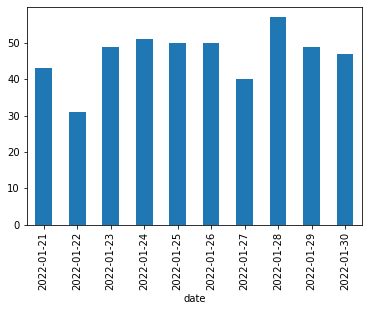

In [146]:
df_date = df.groupby('date')['content'].count().tail(10)
df_date.plot.bar()

# Data Cleaning

These tweets are MESSY. Let's clean it up. I want to remove all mentions (@'s) in tweets. I also want to remove all hashtags (#'s) but keep the text because the hashtag can be a sign of sentiment later on. Lastly we need to remove all emojis and punctuation. For emojis I explored the option of replacing emojis with words describing the emoji. For example 😂 would become laughing. This proved problematic because not all emojis had predefined labels so I removed them entirely.

In [147]:
df

,id,content,language,date
0,0,"If you like Tacos, what do you like more - Har...",en,2022-01-30
1,1,@waiwode I’ve seen rumblings about that…shhhhh...,en,2022-01-30
2,2,"You can #okboomer me if you want, but if you s...",en,2022-01-30
3,3,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...,en,2022-01-30
4,4,"We are talking #TacoBell, #Truckers, and #Life...",en,2022-01-30
...,...,...,...,...
69995,69995,Add me on Instagram #Instagram #Inktober #AskN...,en,2018-10-04
69997,69997,For #NationalTacoDay get your #fourlegged #fri...,en,2018-10-04
69998,69998,It’s National Taco Day! 🌮 Let’s eat 🍴\n#Nation...,en,2018-10-04
69999,69999,October HAPPY SISTER SPOOKY MONTH 🎃🎃🎃 #98offic...,en,2018-10-04


Let's drop the columns we do not need anymore to save time when cleaning the data

In [148]:
df = df.drop(columns = ["language", "date", "id"])

Start by removing all @'s, links, and replacing hte #'s

In [149]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet) #Remove @ sign
    tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = tweet.replace("#", "") #Remove hashtag sign but keep the text
    return tweet

df['content'] = df['content'].map(lambda x: cleaner(x))
df

,content
0,"If you like Tacos, what do you like more - Har..."
1,I’ve seen rumblings about that…shhhhh\n\n\n
2,"You can me if you want, but if you set out to..."
3,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...
4,"We are talking , , and with the Happy Hour An..."
...,...
69995,Add me on Instagram
69997,For get your some seasoning for their . Th...
69998,It’s National Taco Day! 🌮 Let’s eat 🍴\n
69999,October HAPPY SISTER SPOOKY MONTH 🎃🎃🎃


First attempt at removing all emojis

In [150]:
#With new emojis being added this gets MOST but not all emojis in the data
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['content'] = df['content'].map(lambda x: remove_emoji(x))

First attempt at removing all punctuation.

In [151]:
punc = '''!()-[]{};:'""\,<>./?@#$%^&*_~'''

In [152]:
def remove_punct(text):
    text = re.sub('[0-9]+', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    for char in text:
        if char in punc:
            text = text.replace(char,"")
    text = text.replace("amp", "") #& is replaced with amp, remove
    text = text.replace("\n", "") #remove indents
    text = text.lstrip()
    text = text.rstrip()
    return text

df['Tweet_clean'] = df['content'].map(lambda x: remove_punct(x))

Oh no! Our data is not all clean yet. This was something I could not figure out how it was not grabbing all the punctuation. The solution I ultimately had was to search through the dataset one more time but did it by each character in evert Tweet_clean row. This takes a LOT longer than the above solution but gaurentees we remove all punctuation.

In [154]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,'')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

#Iterate through tweets and replace #, @, links, special characters, and punctuation
for x in df["Tweet_clean"]:
    old = x
    new = strip_all_entities(strip_links(x))
    new = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in new.split("\n")]
    df["Tweet_clean"] = df["Tweet_clean"].replace([old],new)

In [155]:
df = df.drop_duplicates(subset=['Tweet_clean'])

Now its all clean! We can finally create a copy of the dataset we have and save it.

# What we actually need

what we really need for the model we will be buidling is the content of the tweet. We will be dropping the other columns and save to a new csv file called cleaned_tweets.csv. We will be hand labeling the data starting now! Hand labeled data will be in the labeled column that I will create in Excel After we have labeled the data we will look into tokenizing the tweets, removing stop words, stemming and lammitization

In [158]:
#df = df.drop(columns=['content'])
df = df.reset_index()
df = df.drop(columns='index')
df.to_csv("cleaned_tweets.csv")
df.head(20)

,content,Tweet_clean
0,"If you like Tacos, what do you like more - Har...",If you like Tacos what do you like more Hard o...
1,I’ve seen rumblings about that…shhhhh\n\n\n,I ve seen rumblings about that shhhhh
2,"You can me if you want, but if you set out to...",You can me if you want but if you set out to c...
3,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...,TEH TRAITRS R AGENTS OV TEH ANTICHRIST AN THEI...
4,"We are talking , , and with the Happy Hour An...",We are talking and with the Happy Hour Anchorm...
5,Is there any thing at Taco Bell that is real f...,Is there any thing at Taco Bell that is real food
6,Start them out right! 17yo future paramedic ...,Start them out right yo future paramedic Taco ...
7,"Every time my kid picks over delicious, local...",Every time my kid picks over delicious local T...
8,"son super excited, to b getting support dog. ...",son super excited to b getting support dog Txt...
9,is calling my name right now..lol\nBbs,is calling my name right nowlolBbs
